## Importando bibliotecas

In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Inicialização das variáveis do problema de advecção

In [63]:
# Spatial discretization
L = 10.0                                      # Domain length
n = 101                                       # Number of points
dx = L/(n-1)                                  # Length of spacing
x = np.linspace(0,L,n)                        # Node Positions

# Time discretization
nt = 10                                       # Number of time steps
dt = 0.1                                      # Time step

# Wave equation parameters
a = 0.5                                       # Velocity coefficient

# Initial conditions
f = np.zeros((n,1))                           # Wave function (Initialization)
f[40:60] = 1.0                                # Wave square pulse

## Perfil inicial da função f

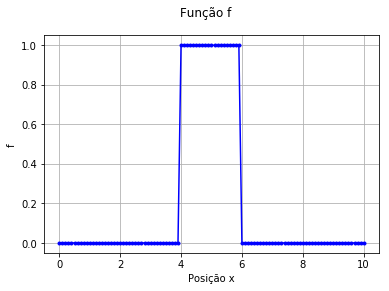

In [64]:
plt.plot(x,f,'.-b')
plt.suptitle('Função f')
plt.xlabel('Posição x')
plt.ylabel('f')
plt.grid()
plt.show()

## Solução da equação com Upwind

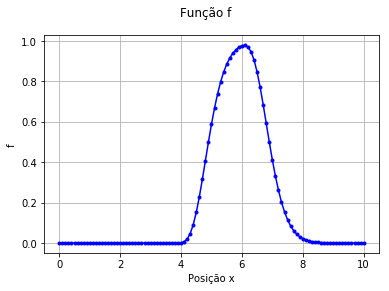

In [65]:
# Time loop
for k in range(0,nt):
    f_old = f
    for i in range(1,n-1):
        f[i] = f_old[i] - (a*dt/dx)*(f_old[i]-f_old[i-1])
    f[0] = f_old[n-1]
    
plt.plot(x,f,'.-b')
plt.suptitle('Função f')
plt.xlabel('Posição x')
plt.ylabel('f')
plt.grid()
plt.show()